1. Markowitz’s Critical Line Algorithm (CLA)

Requires inverting the covariance matrix, which becomes unstable when assets are highly correlated.

Small changes in inputs can lead to large swings in portfolio weights.

Often results in overly concentrated portfolios and poor out-of-sample performance.

2. Traditional Risk Parity (Inverse-Variance Portfolio, IVP)

Ignores the correlation structure between assets.

Can expose the portfolio to systemic shocks.

3. HRP Methodology: 3 Main Stages

Stage 1: Tree Clustering
Transforms the correlation matrix into a distance matrix.

Uses hierarchical clustering to build a tree structure (dendrogram) of the assets.

Assets are grouped based on similarity, not just pairwise correlations.

Stage 2: Quasi-Diagonalization
Reorders the covariance matrix using the tree structure.

Similar assets are placed next to each other to reflect structure in their relationships.

This helps in making more stable weight allocations.

Stage 3: Recursive Bisection
Splits the tree top-down and allocates portfolio weights recursively.

Allocations are done inversely proportional to cluster variances.

This step balances the portfolio across clusters, maintaining both diversification and robustness.

4. Results 

In-Sample:
CLA had slightly lower variance than HRP (because that's its optimization goal).

However, CLA concentrated weights on only a few assets.

Out-of-Sample (via Monte Carlo Simulation):
HRP achieved the lowest variance out-of-sample — better than CLA and IVP.

HRP improved Sharpe ratio performance and showed more robust diversification.

Less sensitivity to shocks (both systemic and idiosyncratic).

5. Key Benefits of HRP

Does not require matrix inversion.

Works with singular or ill-conditioned covariance matrices.

Logarithmic time complexity — fast even for large portfolios.

Naturally incorporates hierarchical structure, which improves interpretability and robustness.

6. Conclusions

HRP is a practical, scalable, and robust alternative to classical optimization methods. It is especially useful in:

High-dimensional settings (many assets, little data).

Financial systems with strong correlations.

Is useful in any situation where stability and interpretability are crucial.

In [3]:
import pandas as pd

import pypfopt

file_path = r"C:\Users\jaseb\Homework\stock_prices.csv"

data = pd.read_csv(
    file_path,
    index_col=0,
    parse_dates=True,
    date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y')
)

# Step 2: Remove dollar signs and convert to float
data = data.replace('[\$,]', '', regex=True).astype(float)

# Step 3: Drop any rows with missing values (just in case)
data = data.dropna()

data.head()



mu = pypfopt.expected_returns.mean_historical_return(data)
S = pypfopt.risk_models.sample_cov(data)

ef = pypfopt.EfficientFrontier(mu, S)
weights_ef = ef.max_sharpe()
cleaned_weights_ef = ef.clean_weights()

print("Efficient Frontier Portfolio Weights:")
print(cleaned_weights_ef)


hrp = pypfopt.HRPOpt(data)
weights_hrp = hrp.optimize()

print("Hierarchical Risk Parity Portfolio Weights:")
print(weights_hrp)


C:\Users\jaseb\AppData\Local\Temp\ipykernel_5204\896789569.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(


Efficient Frontier Portfolio Weights:
OrderedDict([(' AAPL ', 0.18727), (' AMT ', 0.12714), (' AMZN ', 0.0), (' COST ', 0.28369), (' GE ', 0.20447), (' JPM ', 0.11797), (' META ', 0.0), (' MSFT ', 0.0), (' NEE ', 0.07946), (' SHW ', 0.0), (' UNH ', 0.0), (' XOM ', 0.0)])
Hierarchical Risk Parity Portfolio Weights:
OrderedDict([(' AAPL ', 0.008173491978558222), (' AMT ', 0.015732850954646202), (' AMZN ', 0.016372153207214964), (' COST ', 0.0005486650833876603), (' GE ', 0.044061025265351945), (' JPM ', 0.007947725691974786), (' META ', 0.0010570816711394963), (' MSFT ', 0.03834003013695802), (' NEE ', 0.1578366976023462), (' SHW ', 0.0033138842341450298), (' UNH ', 0.001382123758382575), (' XOM ', 0.7052342704158949)])


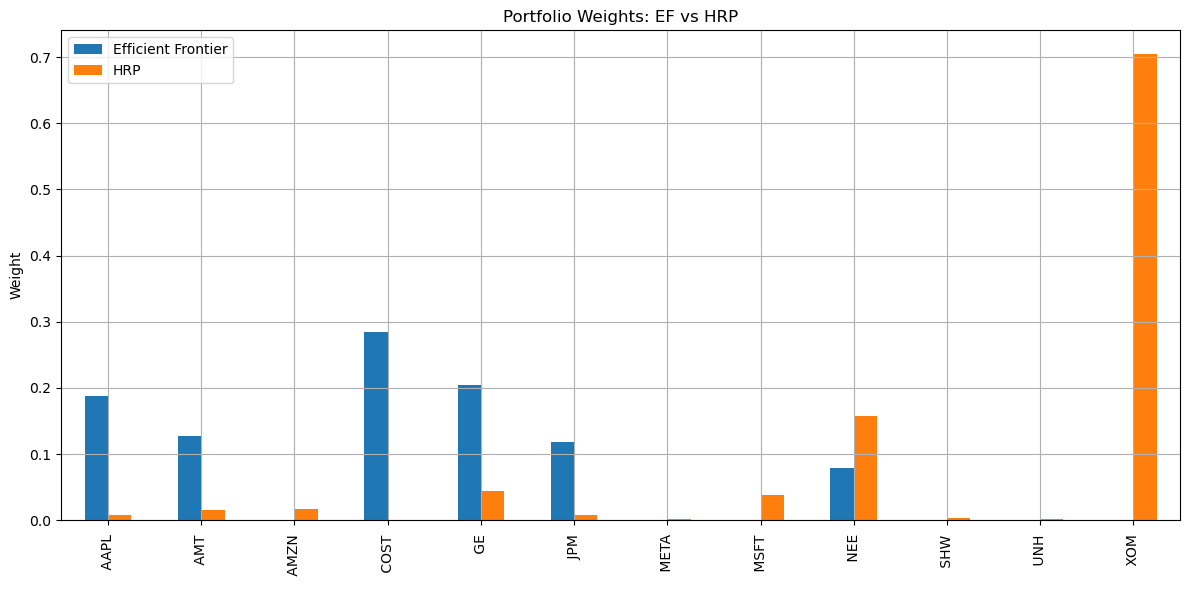

In [4]:
import matplotlib.pyplot as plt

# Bar chart comparison
df_weights = pd.DataFrame({
    'Efficient Frontier': cleaned_weights_ef,
    'HRP': weights_hrp
}).fillna(0)

df_weights.plot(kind='bar', figsize=(12, 6))
plt.title("Portfolio Weights: EF vs HRP")
plt.ylabel("Weight")
plt.grid(True)
plt.tight_layout()
plt.show()
